# 선형 모델(Linear Model)


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
from matplotlib import rc, font_manager
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family=font_name)
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
from scipy import stats
#!pip install mglearn

w[0]: 0.393906  b: -0.031804


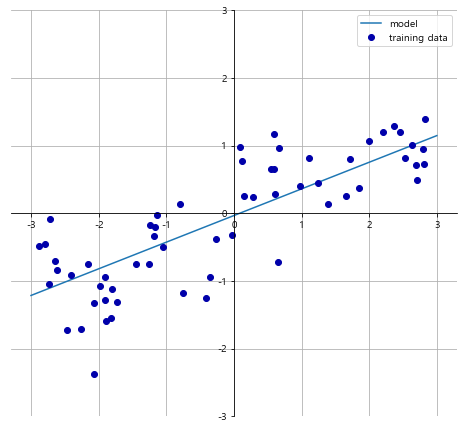

In [3]:
mglearn.plots.plot_linear_regression_wave()

In [5]:
# 주제 :전기 생산량과 소비량 
# 귀무 가설 : 전기 생산량과 전기 소비량 간의 상관관계가 없다 
# 연구 가설 : 전기 생산량과 전기 소비량 간의 상관관계가 있다 

# 월별 전기 사용량 (백만kWh)
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

# 월별 전기 생산금액(억원)
X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]

from scipy import stats

result = stats.linregress(X, y)
result

# rvalue=0.8929235125385305 (상관계수 : 상관관계는 높다)
# pvalue=9.238421943157891e-05 (대립가설 성립 : 상관관계가 있다)

LinregressResult(slope=0.4956032360182905, intercept=0.9195814280689418, rvalue=0.8929235125385305, pvalue=9.238421943157891e-05, stderr=0.07901935226531728)

<class 'numpy.ndarray'>


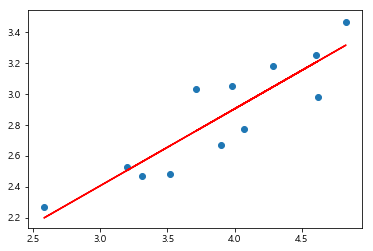

In [9]:
# 그래프 그리기
slope, intercept, r_value, p_value, stderr = stats.linregress(X, y)
type(X) # list
X1 = np.array(X)
print(type(X1))
plt.scatter(X, y)
plt.plot(X1, slope*X1+intercept, c="red")  #선형회귀기본직선

In [8]:
# 생산량이 4일때 사용량은 얼마일까?
4 * slope + intercept

2.901994372142104

In [10]:
############# 한번 해보기 ###############

# 주제 : 온도와 오존량의 관계
# 귀무가설 : 온도가 오존량에 영향을 미치지 않는다.
# 연구가설 : 온다가 오존량에 영향을 미친다.
# 예측 : 온도가 화씨 80도일때 오존량 예측

In [23]:
# 오존데이터 불러오기
ozone = pd.read_csv("data/ozone.csv")
ozone.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [29]:
# 결측치값 중앙값으로 대체
median = ozone["Ozone"].median()
ozone["Ozone"].fillna(median, inplace=True)
ozone.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,31.5,NaN,14.3,56,5,5


In [30]:
X = ozone["Temp"]
y = ozone["Ozone"]
from scipy import stats

result = stats.linregress(X, y)
result

LinregressResult(slope=1.8443072257930753, intercept=-104.08016276176656, rvalue=0.6008327861457484, pvalue=2.204972201658742e-16, stderr=0.1996832274584128)

<class 'numpy.ndarray'>


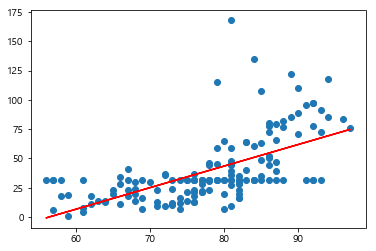

In [31]:
# 그래프 그리기
slope, intercept, r_value, p_value, stderr = stats.linregress(X, y)
type(X) # list
X1 = np.array(X)
print(type(X1))
plt.scatter(X, y)
plt.plot(X1, slope*X1+intercept, c="red")  #선형회귀기본직선

In [32]:
# 예측 : 온도가 화씨 80도일때 오존량 예측
80*slope + intercept

43.46441530167945

In [33]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston = load_boston()
model_boston = LinearRegression().fit(boston.data, boston.target)

In [40]:
dir(model_boston)
print(model_boston.coef_)
print(model_boston.intercept_)
print(boston.feature_names)
print(boston.keys())

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
36.459488385089855
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


Text(0.5, 1.0, '집값 예측치와 실제 집값의 관계')

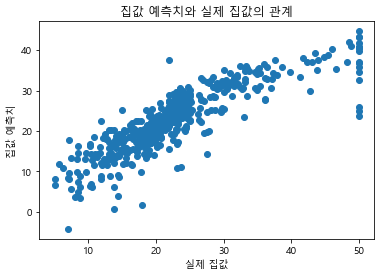

In [41]:
prediction = model_boston.predict(boston.data)
plt.scatter(boston.target, prediction)
plt.xlabel('실제 집값')
plt.ylabel('집값 예측치')
plt.title('집값 예측치와 실제 집값의 관계')

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


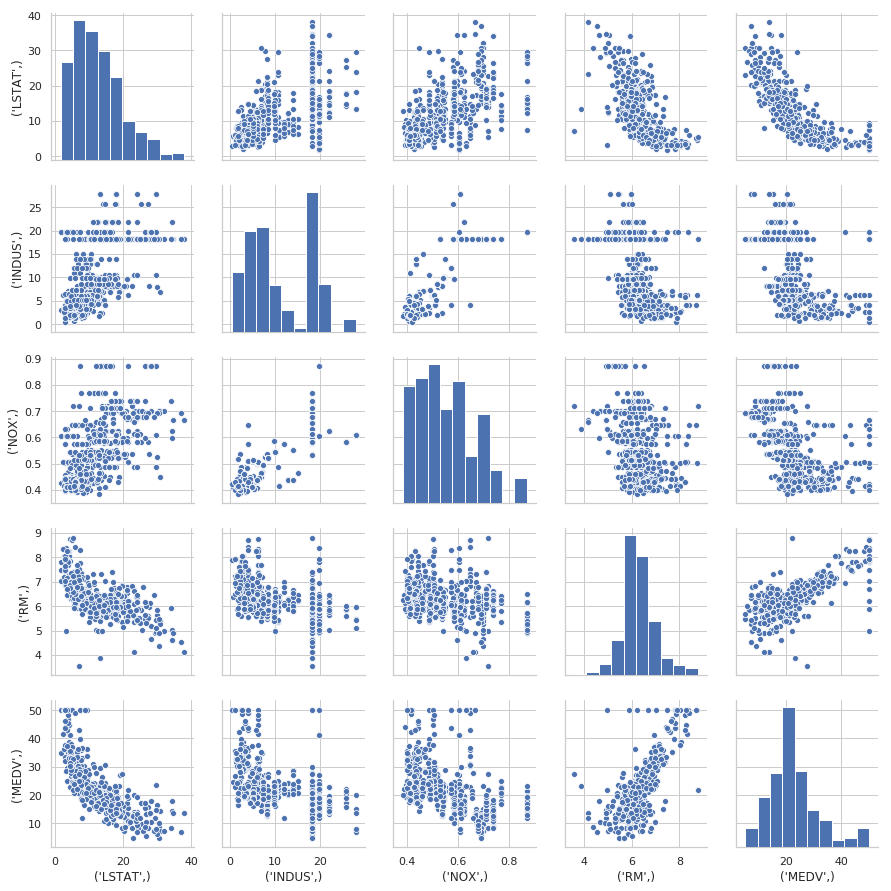

In [43]:
#
# df = pd.DataFrame(boston.data)
# df.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "LSTAT", "MEDV"]
# df

# sns.set(style="whitegrid", context="notebook")
# cols = ["LSTAT", "INDUS", "NOX", "RM", "MEDV"]
# sns.pairplot(df[cols], size=2.5)

df = pd.DataFrame(boston.data, columns=[boston.feature_names])
df['MEDV'] = boston.target

sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5)
sns.reset_orig()

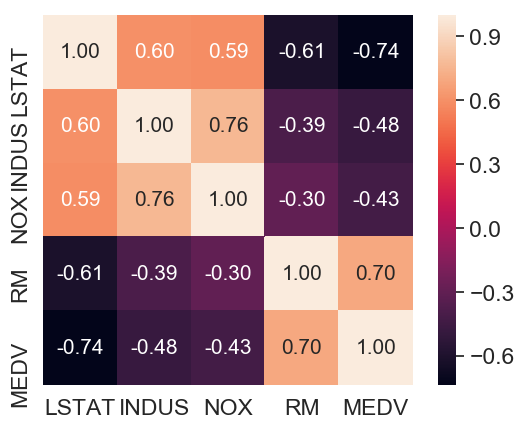

In [44]:
# seaborn의 heatmap 그래프 그리기
sns.set(font_scale=1.5)
cm = np.corrcoef(df[cols].values.T)
heat = sns.heatmap(cm, cbar=True, square=True, annot=True, fmt=".2f", annot_kws={'size':15}, yticklabels=cols, xticklabels=cols)

기울기 : 9.102
절편 : -34.671


Text(0.5, 1.0, '1978년 미국 보스턴 외곽지역[방의 수 - 주택가격]추이\n')

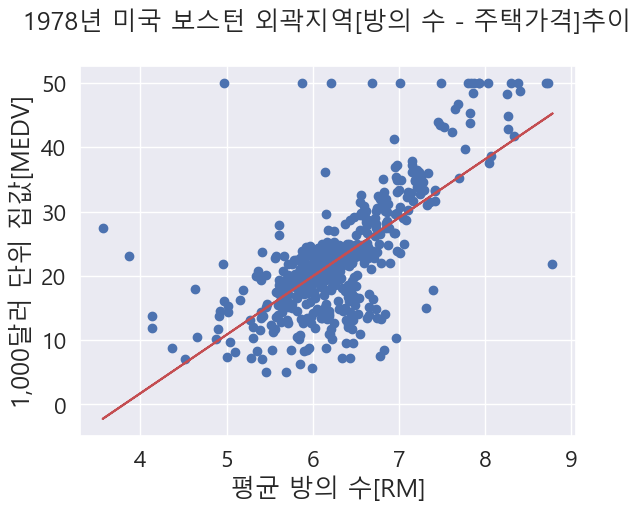

In [47]:
# 주택 가격에 대한 예측
from sklearn.linear_model import LinearRegression
from matplotlib import style

#그래프 그리는 함수
def lin_regplot(X, y, model):
    plt.scatter(X, y, c="b")
    plt.plot(X, model.predict(X), c="R")

X = df[['RM']].values
y = df[['MEDV']].values

slr = LinearRegression().fit(X, y)

slope = slr.coef_[0]
intercept = slr.intercept_
print("기울기 : %.3f\n절편 : %.3f"%(slope, intercept))

lin_regplot(X, y, slr)
plt.xlabel('평균 방의 수[RM]')
plt.ylabel('1,000달러 단위 집값[MEDV]')
plt.title('1978년 미국 보스턴 외곽지역[방의 수 - 주택가격]추이\n')



In [49]:
num_rooms = np.array([[5.0]])
house_val = slr.predict(num_rooms)
print("방이 [%d]개인 주택가격은 약[%.f]달러이다."%(int(num_rooms), house_val*1000))

방이 [5]개인 주택가격은 약[10840]달러이다.


In [50]:
# 단순 회귀
type(boston.data)

X = boston.data[:, 5]
X.shape
X1 = np.atleast_2d(X)
X1.shape
X2 = np.transpose(X1)
X2.shape

lr = LinearRegression().fit(X2, boston.target)
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
# 적합도 측정 : MSES(Mean Squared Error), RMSE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(boston.target, lr.predict(X2))
r2 = r2_score(boston.target, lr.predict(X2))
print(r2)

r2 = lr.score(X2, boston.target)
print(r2)

0.48352545599133423
0.4835254559913343


In [52]:
# 다중 회귀
lr = LinearRegression().fit(boston.data, boston.target)

In [63]:
# 정규화(Regularization)
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [64]:
lr = LinearRegression().fit(X_train, y_train)

In [65]:
print("훈련 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 점수 : 0.67
테스트 점수 : 0.66


In [66]:
# 특성이 많은 데이터일 경우

X, y = mglearn.datasets.load_extended_boston()
X.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [67]:
print("훈련 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 점수 : 0.95
테스트 점수 : 0.61


In [68]:
# 릿지 회귀(Ridge Regression)
# -가중치의 절대값을 가능한 한 작게 만든다.
# - L2 Regularization

from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("훈련 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

훈련 점수 : 0.89
테스트 점수 : 0.75


In [69]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 점수 : 0.79
테스트 점수 : 0.64


In [70]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 점수 : 0.93
테스트 점수 : 0.77


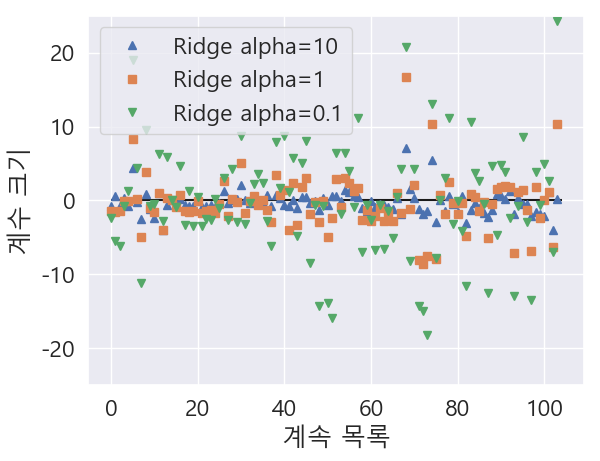

In [71]:
plt.plot(ridge10.coef_, "^", label="Ridge alpha=10")
plt.plot(ridge.coef_, "s", label="Ridge alpha=1")
plt.plot(ridge01.coef_, "v", label="Ridge alpha=0.1")

plt.hlines(0, 0, len(lr.coef_))
plt.xlabel("계속 목록")
plt.ylabel("계수 크기")
plt.ylim(-25, 25)
plt.legend()

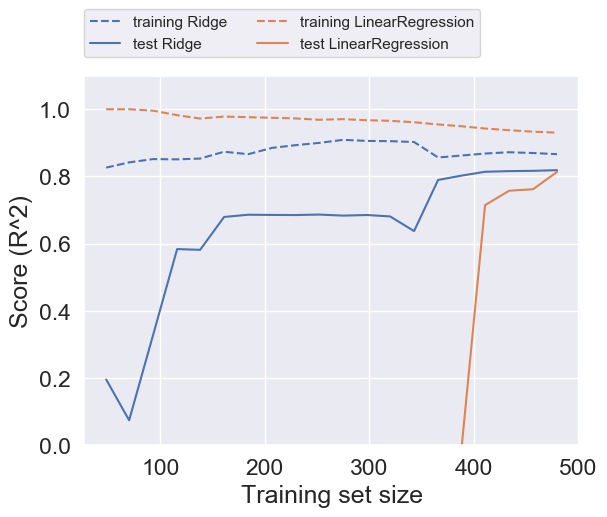

In [26]:
# alpha값을 고정하고 훈련 데이터의 크기를 변화 시킨다.
mglearn.plots.plot_ridge_n_samples()

In [27]:
# 라쏘 회귀(Lasso Regression)
# -릿지회귀의 대안으로 사용
# - L1 Regularization

In [28]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso.coef_!=0)))

훈련 점수 : 0.29
테스트 점수 : 0.21
사용한 특성의 수 : 4


In [29]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 점수 : {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 점수 : {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso001.coef_!=0)))

훈련 점수 : 0.90
테스트 점수 : 0.77
사용한 특성의 수 : 33


In [30]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 점수 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 점수 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso00001.coef_!=0)))

훈련 점수 : 0.95
테스트 점수 : 0.64
사용한 특성의 수 : 96


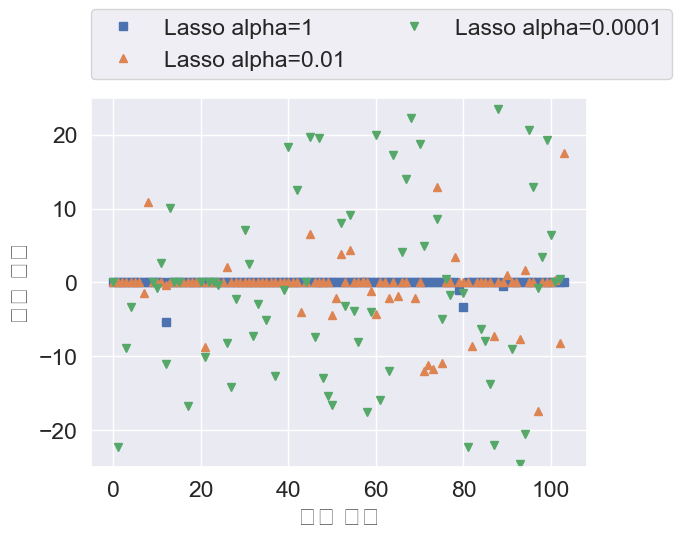

In [31]:
plt.plot(lasso.coef_, "s", label="Lasso alpha=1")
plt.plot(lasso001.coef_, "^", label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, "v", label="Lasso alpha=0.0001")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))


# 분류형 선형 모델

## 1. linear_model.logisticRegression
        - 로지스틱 Loss function
        
## 2. svm.LinearSVC
        - 교차 엔트로피 Loss function

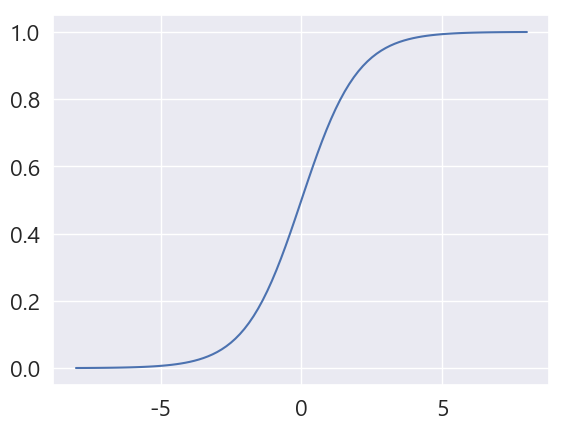

In [72]:
# sigmoid 그래프 그리기
def sigmoid(x):
    a =[]
    for i in x:
        a.append(1 / (1+ np.exp(-i)))
        
    return a


x = np.linspace(-8, 8, 100)
sig = sigmoid(x)

plt.plot(x, sig)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


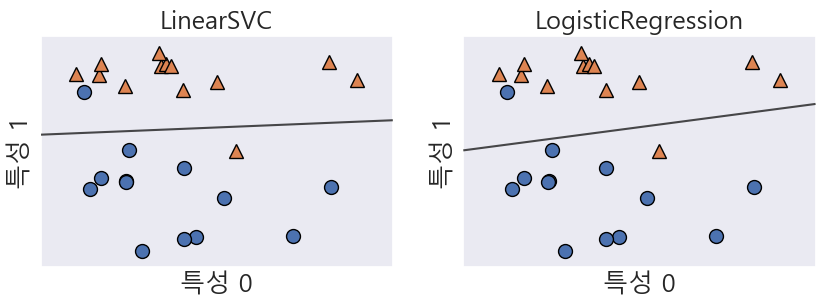

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")

In [75]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42, stratify=cancer.target)

In [76]:
logreg = LogisticRegression(C=1).fit(X_train, y_train)
print("훈련 점수 : {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 점수 : {:.3f}".format(logreg.score(X_test, y_test)))

훈련 점수 : 0.955
테스트 점수 : 0.958


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [77]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("훈련 점수 : {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 점수 : {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 점수 : 0.972
테스트 점수 : 0.965


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [78]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 점수 : {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 점수 : {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 점수 : 0.934
테스트 점수 : 0.930


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


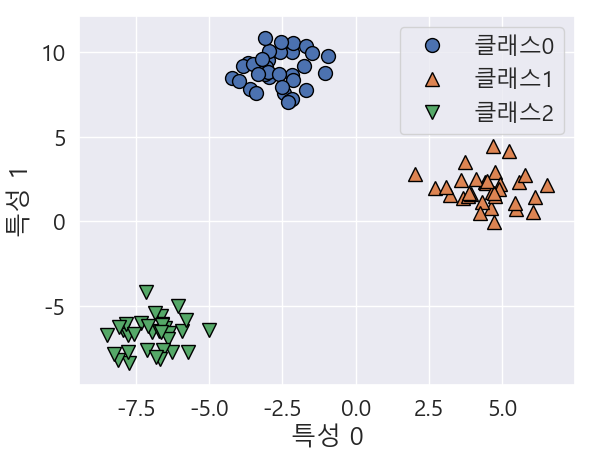

In [79]:
# 다중 클래스 분류용 선형 모델
# - 일대다 방법(One-vs-rest)

from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스0', '클래스1', '클래스2'])

In [80]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


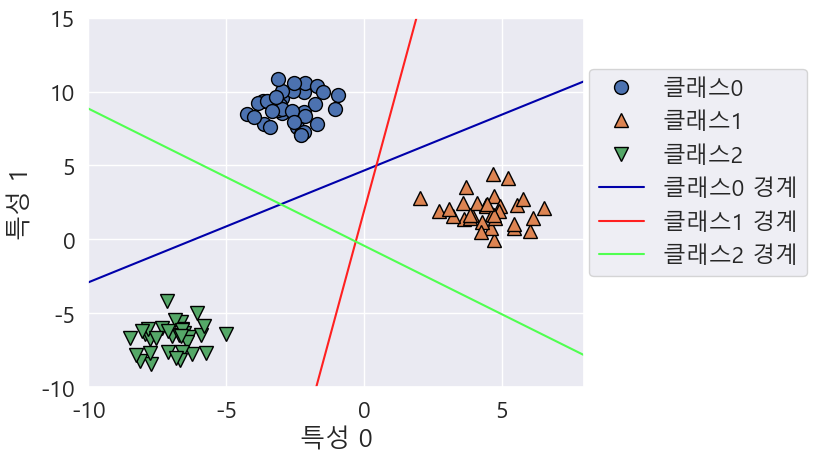

In [81]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept)/coef[1], c=color)
    
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스0', '클래스1', '클래스2', '클래스0 경계', '클래스1 경계', '클래스2 경계'], loc=(1.01, 0.3))

# 적합도 검정

    - 정확성(Accuracy)
    - 정밀도(Precision)
    - 재생율(Recall)

In [82]:
y_true = [2, 0, 2, 2, 0 ,1]
y_pred = [0, 0, 2, 2, 0, 2]

from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [83]:
# 이진 분류 예제
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]

confusion_matrix(y_true, y_pred)

array([[2, 0],
       [1, 3]], dtype=int64)

In [84]:
y_true = [0, 0, 0, 1, 1, 0, 0]
y_pred = [0, 0, 0, 0, 1, 1, 1]

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.75      0.60      0.67         5
     class 1       0.33      0.50      0.40         2

   micro avg       0.57      0.57      0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



In [85]:
# ROC 커브 & AUC
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=16, n_features=2, n_informative=2, n_redundant=0, random_state=0)

In [86]:
model = LogisticRegression().fit(X, y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [87]:
y_hat = model.predict(X)
f_value = model.decision_function(X)
df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=["f", "y_hat", "y"])
df.sort_values("f", ascending=False).reset_index(drop=True)

,f,y_hat,y
0,2.167628,1.0,1.0
1,1.861485,1.0,1.0
2,1.482220,1.0,1.0
3,1.447944,1.0,1.0
4,1.432822,1.0,1.0
5,1.035662,1.0,1.0
6,0.244729,1.0,0.0
7,-0.063016,0.0,1.0
8,-0.582239,0.0,0.0
9,-0.878385,0.0,0.0


In [88]:
confusion_matrix(y, y_hat, labels=[1,0])

array([[6, 2],
       [1, 7]], dtype=int64)

In [89]:
recall = 6 / (6+2)
fallout = 1 / (1+7)
print("recall=", recall)
print("fallout=", fallout)

recall= 0.75
fallout= 0.125


In [90]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))

Text(0, 0.5, 'True Positive Rate(Recall)')

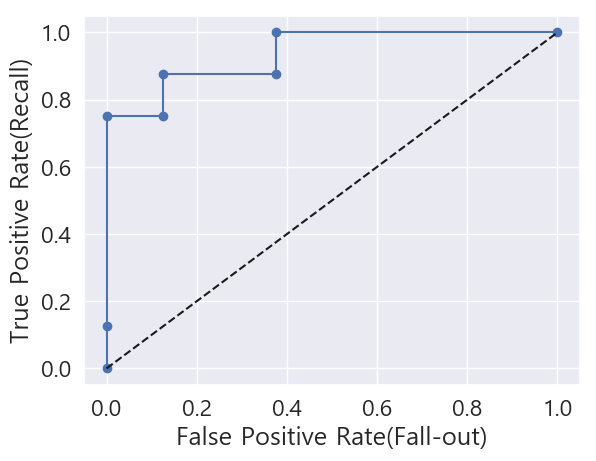

In [91]:
plt.plot(fpr, tpr, 'o-', label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.xlabel("False Positive Rate(Fall-out)")
plt.ylabel("True Positive Rate(Recall)")

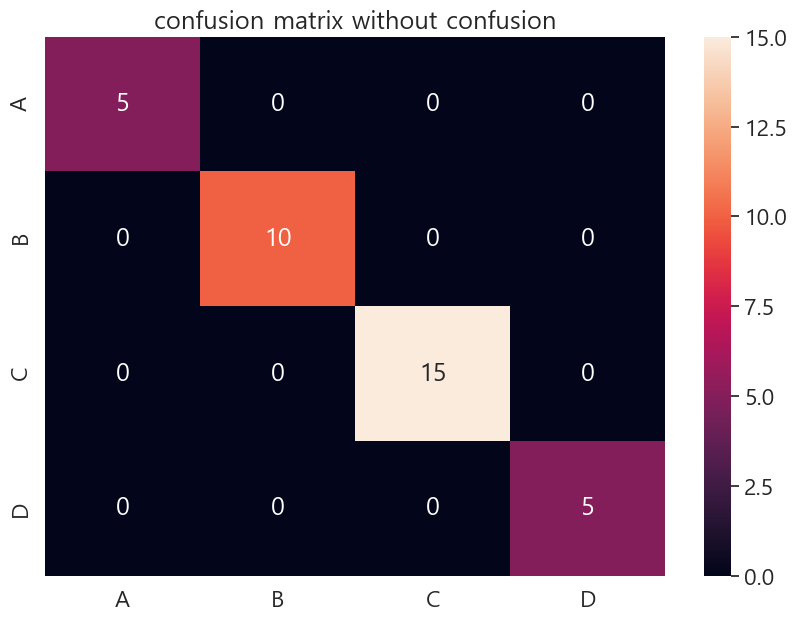

In [92]:
# 오차표를 히트맵으로 그리기
array = [[5, 0, 0, 0],
        [0, 10, 0, 0],
        [0, 0, 15, 0],
        [0, 0, 0, 5]]

df_cm = pd.DataFrame(array, index=[i for i in "ABCD"], columns=[i for i in "ABCD"])
df_cm

plt.figure(figsize=(10, 7))
plt.title("confusion matrix without confusion")
sns.heatmap(df_cm, annot=True)


In [93]:
# 오차표를 히트맵으로 그리기
array = [[9, 1, 0, 0],
        [1, 15, 3, 1],
        [5, 0, 24, 1],
        [0, 4, 1, 5]]

total = np.sum(array, axis=1)
array = array / total[:, None]
array


# df_cm = pd.DataFrame(array, index=[i for i in "ABCD"], columns=[i for i in "ABCD"])
# df_cm

# plt.figure(figsize=(10, 7))
# plt.title("confusion matrix without confusion")
# sns.heatmap(df_cm, annot=True)

array([[0.9       , 0.1       , 0.        , 0.        ],
       [0.05      , 0.75      , 0.15      , 0.05      ],
       [0.16666667, 0.        , 0.8       , 0.03333333],
       [0.        , 0.4       , 0.1       , 0.5       ]])

# 타이타닉 예제를 이용한 로지스틱 회귀분석

In [94]:
df = pd.read_csv('data/machinelearning/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
cols_to_keep = ["Survived", "Age", "Fare"]

In [98]:
dummy_pclass = pd.get_dummies(df["Pclass"], prefix="Pclass")
print(dummy_pclass.head())

   Pclass_1  Pclass_2  Pclass_3
0         0         0         1
1         1         0         0
2         0         0         1
3         1         0         0
4         0         0         1


In [99]:
dummy_sex = pd.get_dummies(df["Sex"], prefix="Sex")
print(dummy_sex.head())

   Sex_female  Sex_male
0           0         1
1           1         0
2           1         0
3           1         0
4           0         1


In [103]:
data = df[cols_to_keep].join(dummy_pclass.loc[:, "Pclass_1":])

data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,7.2500,0,0,1
1,1,38.0,71.2833,1,0,0
2,1,26.0,7.9250,0,0,1
3,1,35.0,53.1000,1,0,0
4,0,35.0,8.0500,0,0,1


In [104]:
data = data.join(dummy_sex.loc[:, "Sex_male"])
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male
0,0,22.0,7.2500,0,0,1,1
1,1,38.0,71.2833,1,0,0,0
2,1,26.0,7.9250,0,0,1,0
3,1,35.0,53.1000,1,0,0,0
4,0,35.0,8.0500,0,0,1,1


In [110]:
train_cols = data.columns[1:]
train_cols
data[train_cols] = data[train_cols].fillna(0)
train_cols

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_male'], dtype='object')

In [111]:
import statsmodels.api as sm

model = sm.Logit(data["Survived"], data[train_cols]).fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.458488
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.311     
Dependent Variable: Survived         AIC:              829.0250  
Date:               2019-06-09 17:12 BIC:              857.7791  
No. Observations:   891              Log-Likelihood:   -408.51   
Df Model:           5                LL-Null:          -593.33   
Df Residuals:       885              LLR p-value:      1.0371e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Age          -0.0159    0.0053   -2.9843  0.0028  -0.0264  -0.0055
Fare          0.0015    0.0021    0.7370  0.4611  -0.0026   0.0056
Pclass_1      2.6932    0.3372    7.9875  0.0000   2.0323   3.3540
Pclass_2      1.8519    0.2670    6.9358  0.0000   1.3286   2.3752
Pclass_3      0.6215    0.1808    3.4377  0.0006   0.2672   0.9758
Sex_male     -2.6151    0.1860  -14.0594  0.0000  -2.9797  -2.2505
=================================================================

"""

In [112]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression().fit(data[train_cols], data["Survived"])

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [113]:
data["predict"] = model2.predict(data[train_cols])
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,predict
0,0,22.0,7.2500,0,0,1,1,0
1,1,38.0,71.2833,1,0,0,0,1
2,1,26.0,7.9250,0,0,1,0,1
3,1,35.0,53.1000,1,0,0,0,1
4,0,35.0,8.0500,0,0,1,1,0


In [114]:
from sklearn.metrics import confusion_matrix
confusion_matrix(data["Survived"], data["predict"], labels=[1, 0])

array([[242, 100],
       [ 91, 458]], dtype=int64)

In [115]:
print("정확도 : ", (242 + 458)/ (242 + 100 + 91 + 458))
print("정확도 : ", model2.score(data[train_cols], data["Survived"]))

정확도 :  0.7856341189674523
정확도 :  0.7856341189674523


In [116]:
from sklearn.metrics import classification_report
print(classification_report(data["Survived"], data["predict"], target_names=["class 0", "class 1"]))

              precision    recall  f1-score   support

     class 0       0.82      0.83      0.83       549
     class 1       0.73      0.71      0.72       342

   micro avg       0.79      0.79      0.79       891
   macro avg       0.77      0.77      0.77       891
weighted avg       0.78      0.79      0.79       891



Text(0, 0.5, 'True Positive Rate')

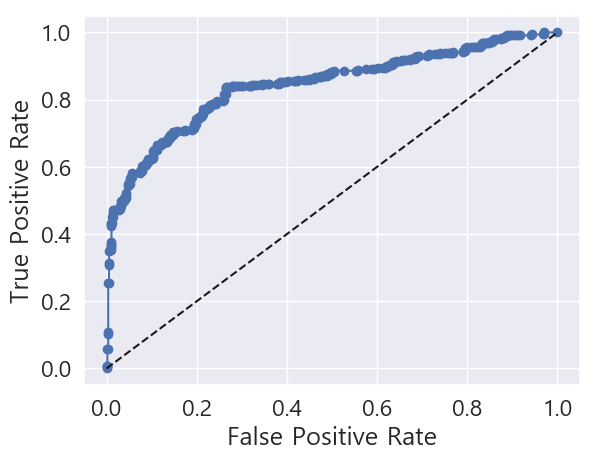

In [117]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(data["Survived"], model2.decision_function(data[train_cols]))

plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Cancer데이터를 이용한 로지스틱 회귀분석

In [118]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
print(breast_cancer.target_names)
print(len(breast_cancer.data))
print(breast_cancer.feature_names)
print(breast_cancer.data[0])

['malignant' 'benign']
569
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [120]:
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
data.head()
sy = pd.Series(breast_cancer.target, dtype='category')
data['class'] = sy
data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [126]:
from sklearn.model_selection import train_test_split

X = data.loc[:, 'mean radius' : 'worst fractal dimension']
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(len(X_train), ', ', len(X_test), ', ', len(y_train), ', ', len(y_test))


426 ,  143 ,  426 ,  143


In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm

log_reg = LogisticRegression().fit(X_train, y_train)
X2 = sm.add_constant(X)
model = sm.OLS(y, X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     61.53
Date:                Sun, 09 Jun 2019   Prob (F-statistic):          6.05e-153
Time:                        17:28:25   Log-Likelihood:                 29.650
No. Observations:                 569   AIC:                             2.699
Df Residuals:                     538   BIC:                             137.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     242.3
Date:                Sun, 09 Jun 2019   Prob (F-statistic):          9.07e-138
Time:                        17:31:35   Log-Likelihood:                -67.265
No. Observations:                 569   AIC:                             146.5
Df Residuals:                     563   BIC:                             172.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.9373      0.14

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 12.049999999999999, 'Predict label')

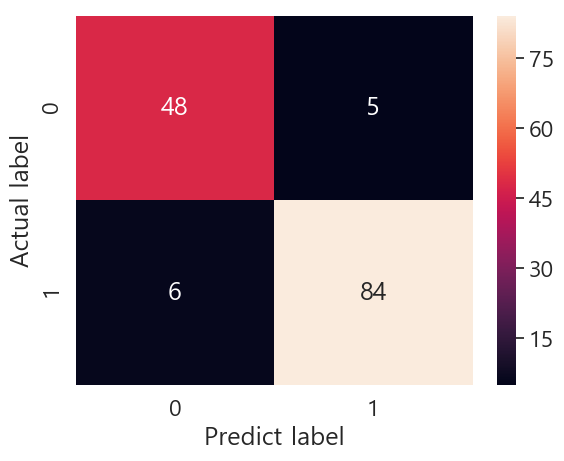

In [128]:
# p-value < 0.05
X = data[['mean compactness', 'smoothness error', 'compactness error', 'worst radius', 'worst area']]
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

log_reg = LogisticRegression().fit(X_train, y_train)
X2 = sm.add_constant(X)
model = sm.OLS(y, X2).fit()
print(model.summary())

y_pred = log_reg.predict(X_test)
y_pred

print("정확도 : ", metrics.accuracy_score(y_test, y_pred))
cnf = metrics.confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(cnf), annot=True)
plt.ylabel("Actual label")
plt.xlabel("Predict label")

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     84.55
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           3.39e-66
Time:                        11:51:45   Log-Likelihood:                -234.52
No. Observations:                 569   AIC:                             481.0
Df Residuals:                     563   BIC:                             507.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 14.049999999999999, 'Predict label')

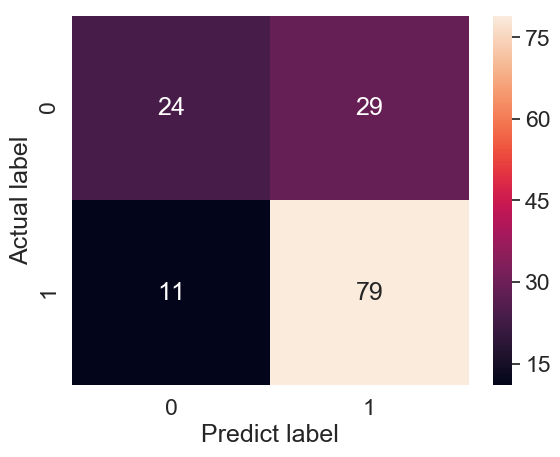

In [94]:
# p-value가 1에 가까운 변수
X = data[['mean texture', 'mean smoothness', 'mean symmetry', 'mean fractal dimension', 'texture error']]
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

log_reg = LogisticRegression().fit(X_train, y_train)
X2 = sm.add_constant(X)
model = sm.OLS(y, X2).fit()
print(model.summary())

y_pred = log_reg.predict(X_test)
y_pred

print("정확도 : ", metrics.accuracy_score(y_test, y_pred))
cnf = metrics.confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(cnf), annot=True)
plt.ylabel("Actual label")
plt.xlabel("Predict label")

In [149]:
# iris데이터를 통한 결정 경계

In [129]:
from sklearn import datasets
    iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [141]:
X = iris["data"][:, 3:]

In [142]:
# 1 Iris-Virginica면 1, 그렇지 않으면 0
y = (iris["target"] == 2).astype(np.int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [143]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

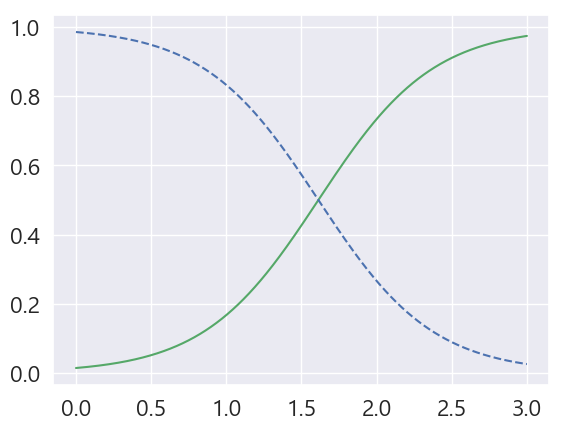

In [148]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-varginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Iris-varginica 아님")
